In [2]:
from __future__ import division
import csv
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
data_sc = pd.read_csv('../results/Upper.csv')
data_sc1 = pd.read_csv('Upper1.csv')

data_stu = pd.read_csv('../results/STU.csv')
data_stu1 = pd.read_csv('STU1.csv')

data_ltu = pd.read_csv('../results/Lower.csv')
data_ltu1 = pd.read_csv('Lower1.csv')

data_raw = pd.read_csv('../results/LLower.csv')
data_raw1 = pd.read_csv('LLower1.csv')

In [6]:
data_sc_first = data_sc.loc[data_sc['n_spell_u']==1]
data_sc1_first = data_sc1.loc[data_sc1['n_spell_u']==1]

data_stu_first = data_stu.loc[data_stu['n_spell_u']==1]
data_stu1_first = data_stu1.loc[data_stu1['n_spell_u']==1]

data_ltu_first = data_ltu.loc[data_ltu['n_spell_u']==1]
data_ltu1_first = data_ltu1.loc[data_ltu1['n_spell_u']==1]

data_raw_first = data_raw.loc[data_raw['n_spell_u']==1]
data_raw1_first = data_raw1.loc[data_raw1['n_spell_u']==1]

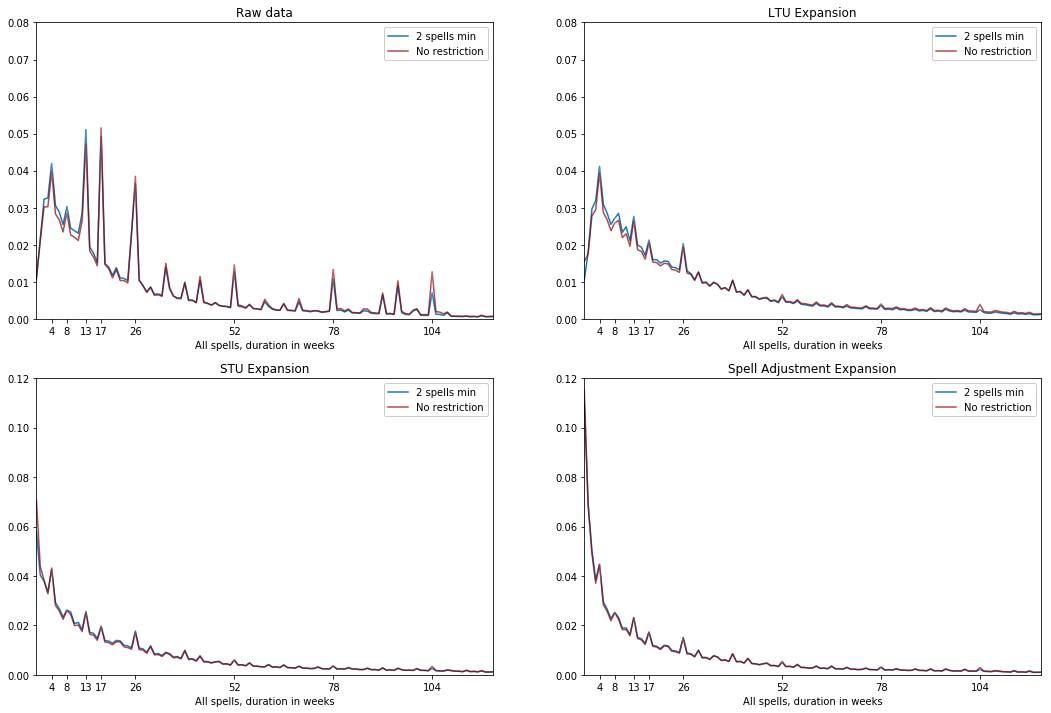

In [7]:
week_range = np.arange(0,1092,7)
spikes = (4,8,13,17,26,52,78,104)

plt.figure(figsize=(18,12))

plt.subplot(221)
plt.title('Raw data')
data_21, bins21 = np.histogram(data_raw['LLdays'],week_range)
data_11, bins11 = np.histogram(data_raw1['LLdays'],week_range)
plt.plot(data_21/np.sum(data_21),label='2 spells min')
plt.plot(data_11/np.sum(data_11),label='No restriction',c='darkred',alpha=0.7)
plt.legend(loc='best', framealpha=1.0)
plt.xticks(spikes)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('All spells, duration in weeks' ) #,fontsize=32
plt.ylim(0,0.08)

plt.subplot(222)
plt.title('LTU Expansion')
data_21, bins21 = np.histogram(data_ltu['Ldays'],week_range)
data_11, bins11 = np.histogram(data_ltu1['Ldays'],week_range)
plt.plot(data_21/np.sum(data_21),label='2 spells min')
plt.plot(data_11/np.sum(data_11),label='No restriction',c='darkred',alpha=0.7)
plt.legend(loc='best', framealpha=1.0)
plt.xticks(spikes)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('All spells, duration in weeks' ) #,fontsize=32
plt.ylim(0,0.08)

plt.subplot(223)
plt.title('STU Expansion')
data_21, bins21 = np.histogram(data_stu['Bdays'],week_range)
data_11, bins11 = np.histogram(data_stu1['Bdays'],week_range)
plt.plot(data_21/np.sum(data_21),label='2 spells min')
plt.plot(data_11/np.sum(data_11),label='No restriction',c='darkred',alpha=0.7)
plt.legend(loc='best', framealpha=1.0)
plt.xticks(spikes)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('All spells, duration in weeks' ) #,fontsize=32
plt.ylim(0,0.12)

plt.subplot(224)
plt.title('Spell Adjustment Expansion')
data_21, bins21 = np.histogram(data_sc['real_days_1'],week_range)
data_11, bins11 = np.histogram(data_sc1['real_days_1'],week_range)
plt.plot(data_21/np.sum(data_21),label='2 spells min')
plt.plot(data_11/np.sum(data_11),label='No restriction',c='darkred',alpha=0.7)
plt.legend(loc='best', framealpha=1.0)
plt.xticks(spikes)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('All spells, duration in weeks' ) #,fontsize=32
plt.ylim(0,0.12)
# plt.savefig("Sample_selection_all.png", format="png", bbox_inches='tight')

plt.show()

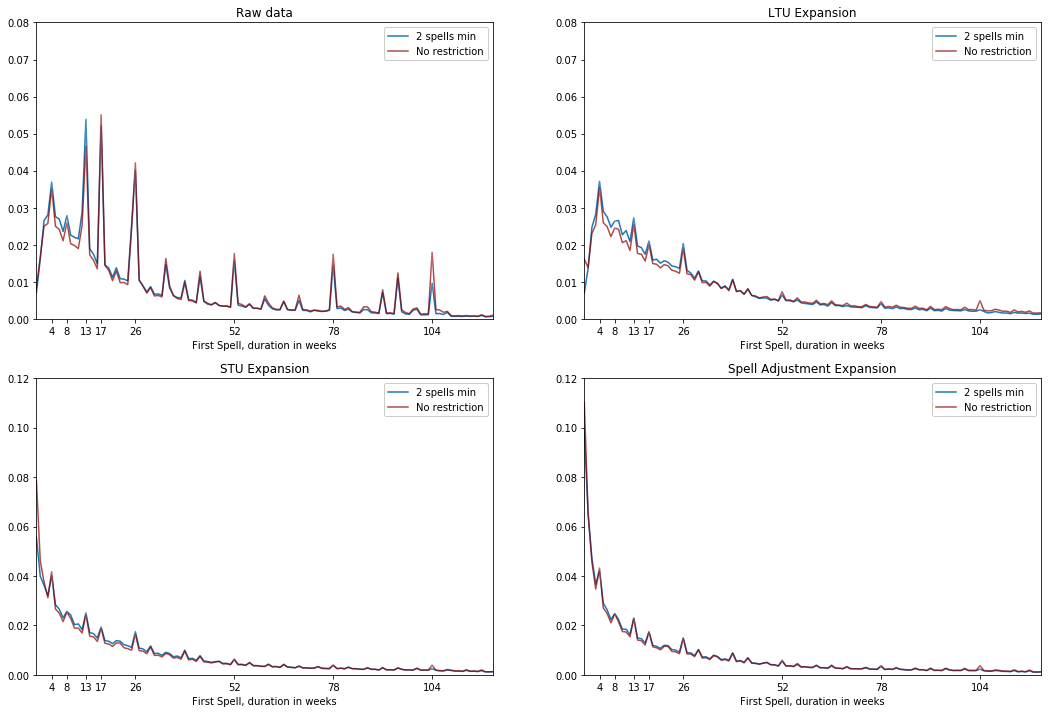

In [8]:
week_range = np.arange(0,1092,7)
spikes = (4,8,13,17,26,52,78,104)

plt.figure(figsize=(18,12))

plt.subplot(221)
plt.title('Raw data')
data_21, bins21 = np.histogram(data_raw_first['LLdays'],week_range)
data_11, bins11 = np.histogram(data_raw1_first['LLdays'],week_range)
plt.plot(data_21/np.sum(data_21),label='2 spells min')
plt.plot(data_11/np.sum(data_11),label='No restriction',c='darkred',alpha=0.7)
plt.legend(loc='best', framealpha=1.0)
plt.xticks(spikes)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks' ) #,fontsize=32
plt.ylim(0,0.08)

plt.subplot(222)
plt.title('LTU Expansion')
data_21, bins21 = np.histogram(data_ltu_first['Ldays'],week_range)
data_11, bins11 = np.histogram(data_ltu1_first['Ldays'],week_range)
plt.plot(data_21/np.sum(data_21),label='2 spells min')
plt.plot(data_11/np.sum(data_11),label='No restriction',c='darkred',alpha=0.7)
plt.legend(loc='best', framealpha=1.0)
plt.xticks(spikes)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks' ) #,fontsize=32
plt.ylim(0,0.08)

plt.subplot(223)
plt.title('STU Expansion')
data_21, bins21 = np.histogram(data_stu_first['Bdays'],week_range)
data_11, bins11 = np.histogram(data_stu1_first['Bdays'],week_range)
plt.plot(data_21/np.sum(data_21),label='2 spells min')
plt.plot(data_11/np.sum(data_11),label='No restriction',c='darkred',alpha=0.7)
plt.legend(loc='best', framealpha=1.0)
plt.xticks(spikes)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks' ) #,fontsize=32
plt.ylim(0,0.12)

plt.subplot(224)
plt.title('Spell Adjustment Expansion')
data_21, bins21 = np.histogram(data_sc_first['real_days_1'],week_range)
data_11, bins11 = np.histogram(data_sc1_first['real_days_1'],week_range)
plt.plot(data_21/np.sum(data_21),label='2 spells min')
plt.plot(data_11/np.sum(data_11),label='No restriction',c='darkred',alpha=0.7)
plt.legend(loc='best', framealpha=1.0)
plt.xticks(spikes)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks' ) #,fontsize=32
plt.ylim(0,0.12)
# plt.savefig("Sample_selection_first.png", format="png", bbox_inches='tight')

plt.show()

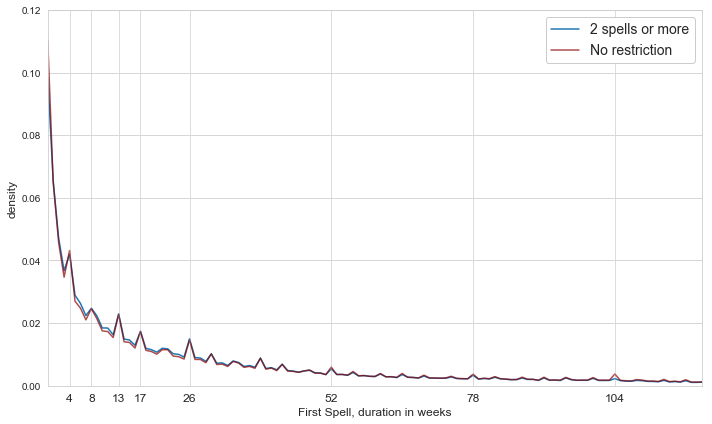

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
data_21, bins21 = np.histogram(data_sc_first['real_days_1'],week_range)
data_11, bins11 = np.histogram(data_sc1_first['real_days_1'],week_range)
plt.plot(data_21/np.sum(data_21),label='2 spells or more')
plt.plot(data_11/np.sum(data_11),label='No restriction',c='darkred',alpha=0.7)
plt.legend(loc='best', framealpha=1.0,fontsize=14)
plt.xticks(spikes,fontsize=12)
plt.ylabel('density',fontsize=12 )
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('First Spell, duration in weeks',fontsize=12 ) #,fontsize=32
plt.ylim(0,0.12)
plt.tight_layout()
plt.savefig("Sample_selection_first_SaC.png", format="png", bbox_inches='tight')
plt.show()

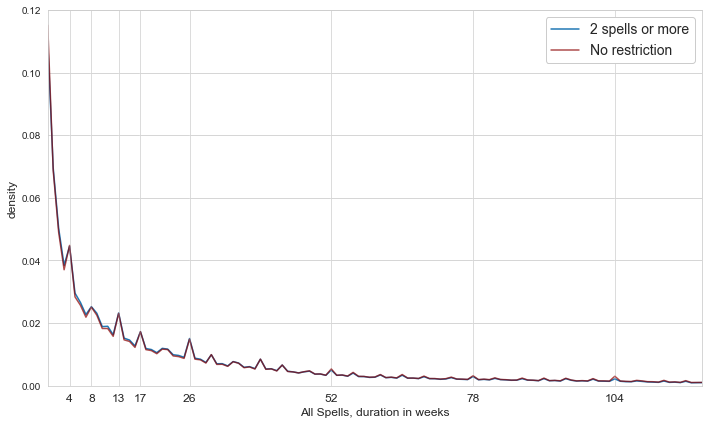

In [11]:
plt.figure(figsize=(10,6))
data_21, bins21 = np.histogram(data_sc['real_days_1'],week_range)
data_11, bins11 = np.histogram(data_sc1['real_days_1'],week_range)
plt.plot(data_21/np.sum(data_21),label='2 spells or more')
plt.plot(data_11/np.sum(data_11),label='No restriction',c='darkred',alpha=0.7)
plt.legend(loc='best', framealpha=1.0,fontsize=14)
plt.xticks(spikes,fontsize=12)
for i in spikes:
    plt.axvline(i, c='white', alpha=0.2)
plt.xlim(0,120)
plt.xlabel('All Spells, duration in weeks',fontsize=12 ) #,fontsize=32
plt.ylabel('density',fontsize=12 )
plt.ylim(0,0.12)
plt.tight_layout()
plt.savefig("Sample_selection_all_SaC.png", format="png", bbox_inches='tight')
plt.show()